## ECE-253 HW4

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

### Problem 1.Detecting Objects with Template Matching

In [328]:
# Cross-Correlation Filter
img = cv2.imread('C://Users/10445/ECE-253/birds1.jpeg',0).astype(np.float64)
temp = cv2.imread('C://Users/10445/ECE-253/template.jpeg',0).astype(np.float64)

img_cc = signal.correlate2d(img,temp,boundary='fill')

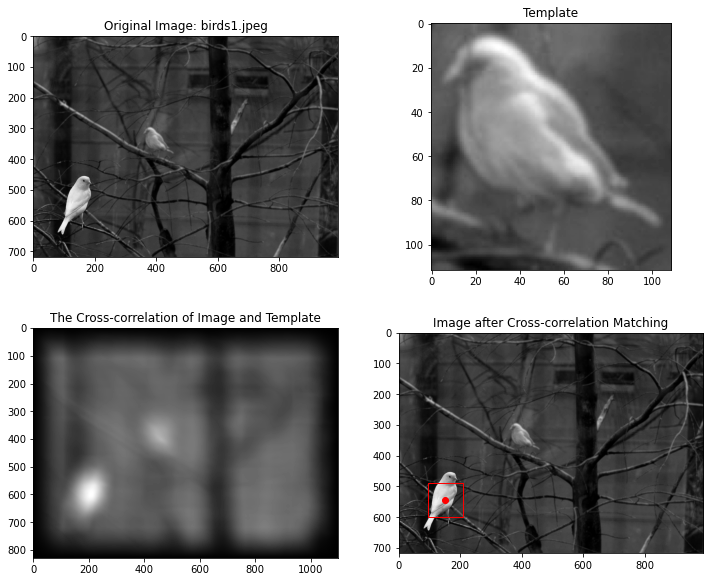

In [338]:
[y,x]= np.argwhere(img_cc == np.max(img_cc))[0]
# Adjust the location of maximum correlation to the coordinate of the original image
y = y - temp.shape[1]//2
x = x - temp.shape[0]//2

rect = Rectangle([x-temp.shape[0]//2,y-temp.shape[1]//2],
                 temp.shape[0],temp.shape[1],linewidth=1, edgecolor='r', facecolor='none')

fig = plt.figure(figsize=(12,10))
ax0 = fig.add_subplot(2,2,1)
ax0.imshow(img,cmap='gray')
ax0.title.set_text('Original Image: birds1.jpeg')
ax1 = fig.add_subplot(2,2,2)
ax1.imshow(temp,cmap='gray')
ax1.title.set_text('Template')
ax2 = fig.add_subplot(2,2,3)
ax2.imshow(img_cc,cmap='gray')
ax2.title.set_text('The Cross-correlation of Image and Template')
ax3 = fig.add_subplot(2,2,4)
ax3.imshow(img,cmap='gray')
ax3.plot(x,y,'ro')
ax3.add_patch(rect)
ax3.title.set_text('Image after Cross-correlation Matching')

In [355]:
def NCC(img,template):
    p_l = template.shape[0]//2
    p_w = template.shape[1]//2
    img_pad = np.pad(img,((p_l,),(p_w,)),'constant')
    img_cc = np.zeros((img.shape[0],img.shape[1]))
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            blocks = img_pad[x:x+template.shape[0],y:y+template.shape[1]]
            corr = np.sum(np.sum(np.multiply(blocks- np.mean(blocks),template- np.mean(template))))
            norm_b = np.sqrt(np.sum(np.sum((blocks - np.mean(blocks))**2)))
            norm_t = np.sqrt(np.sum(np.sum((template - np.mean(template))**2)))
            img_cc[x,y] = corr/norm_b/norm_t
    return img_cc

In [356]:
# birds1.jpeg
img_cc = NCC(img,temp)

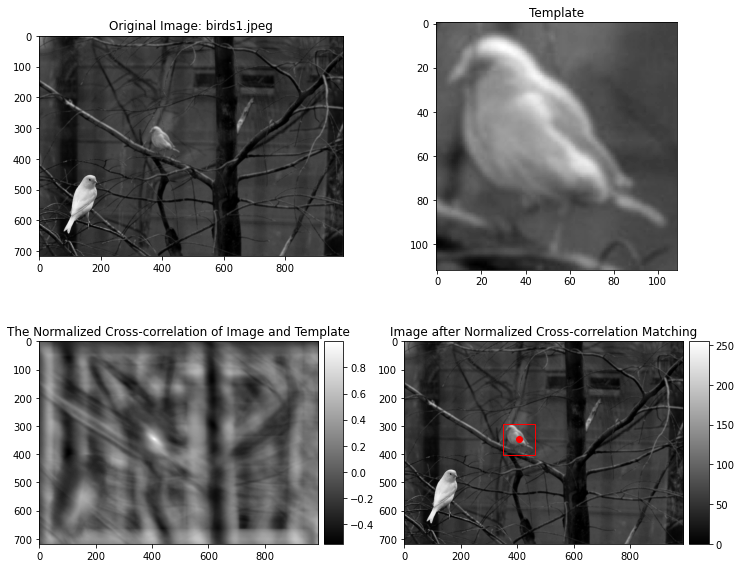

In [365]:
[y,x]= np.argwhere(img_cc == np.max(img_cc))[0]
rect = Rectangle([x-temp.shape[0]//2,y-temp.shape[1]//2],
                 temp.shape[0],temp.shape[1],linewidth=1, edgecolor='r', facecolor='none')

fig = plt.figure(figsize=(12,10))
ax0 = fig.add_subplot(2,2,1)
ax0.imshow(img,cmap='gray')
ax0.title.set_text('Original Image: birds1.jpeg')
ax1 = fig.add_subplot(2,2,2)
ax1.imshow(temp,cmap='gray')
ax1.title.set_text('Template')
ax2 = fig.add_subplot(2,2,3)
im2 = ax2.imshow(img_cc,cmap='gray')
ax2_divider = make_axes_locatable(ax2)
cax2 = ax2_divider.append_axes("right", size="7%", pad="2%")
cb2 = fig.colorbar(im2, cax=cax2, orientation="vertical")
ax2.title.set_text('The Normalized Cross-correlation of Image and Template')
ax3 = fig.add_subplot(2,2,4)
im3 = ax3.imshow(img,cmap='gray')
ax3.plot(x,y,'ro')
ax3.add_patch(rect)
ax3_divider = make_axes_locatable(ax3)
cax3 = ax3_divider.append_axes("right", size="7%", pad="2%")
cb3 = fig.colorbar(im3, cax=cax3, orientation="vertical")
ax3.title.set_text('Image after Normalized Cross-correlation Matching')

In [369]:
# birds2.jpeg
img2 = cv2.imread('C://Users/10445/ECE-253/birds2.jpeg',0).astype(np.float64)
img_cc2 = NCC(img2,temp)

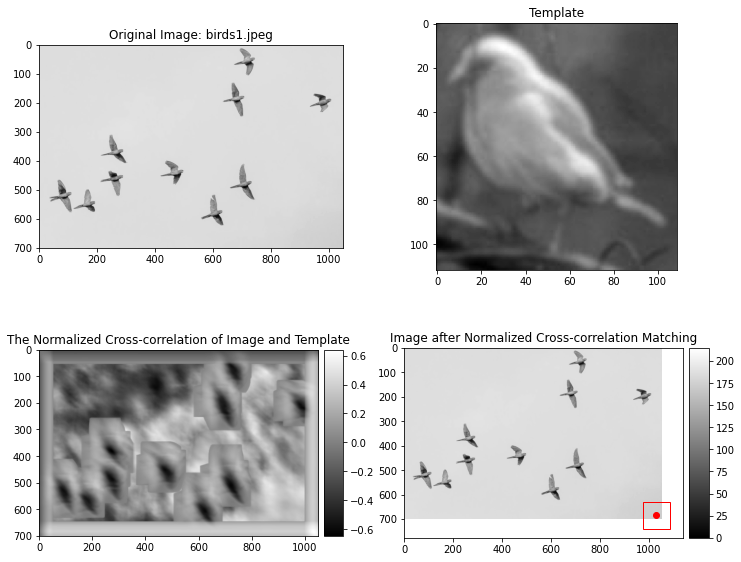

In [370]:
[y,x]= np.argwhere(img_cc2 == np.max(img_cc2))[0]
rect = Rectangle([x-temp.shape[0]//2,y-temp.shape[1]//2],
                 temp.shape[0],temp.shape[1],linewidth=1, edgecolor='r', facecolor='none')

fig = plt.figure(figsize=(12,10))
ax0 = fig.add_subplot(2,2,1)
ax0.imshow(img2,cmap='gray')
ax0.title.set_text('Original Image: birds2.jpeg')
ax1 = fig.add_subplot(2,2,2)
ax1.imshow(temp,cmap='gray')
ax1.title.set_text('Template')
ax2 = fig.add_subplot(2,2,3)
im2 = ax2.imshow(img_cc2,cmap='gray')
ax2_divider = make_axes_locatable(ax2)
cax2 = ax2_divider.append_axes("right", size="7%", pad="2%")
cb2 = fig.colorbar(im2, cax=cax2, orientation="vertical")
ax2.title.set_text('The Normalized Cross-correlation of Image and Template')
ax3 = fig.add_subplot(2,2,4)
im3 = ax3.imshow(img2,cmap='gray')
ax3.plot(x,y,'ro')
ax3.add_patch(rect)
ax3_divider = make_axes_locatable(ax3)
cax3 = ax3_divider.append_axes("right", size="7%", pad="2%")
cb3 = fig.colorbar(im3, cax=cax3, orientation="vertical")
ax3.title.set_text('Image after Normalized Cross-correlation Matching')

As the image "birds2.jpeg" after passing the normalized cross-correlation matching filter shown above, the box does not capture any bird in the image, even any bird is not close to the box. As the correlation image shown, the location of the box is the place where has the highest intensity in the image. Therefore, the box finds the location of maximum intensity rather than a bird. 

 ### Problem 2. Hough Transform

In [22]:
def HT(img):
    # In the function HT, it performs the Hough transform on the input image
    # and return the output accumulator, which is a 2D array of counts of 
    # each pair of rho and theta.

    width, length = img.shape
    max_D = np.round(np.sqrt(width**2+length**2)).astype(int)

    # Generate the interval of theta and rho. 
    # theta: [-90,90], notice theta should be converted into radius when implementing np.cos and np.sin
    # rho: [-D,D], where D is the maximun distance of the input imgae, i.e., D = round(sqrt(img.width**2+img.length**2))
    theta_d = np.arange(-90,91).astype(int)
    theta_r = np.deg2rad(theta_d)
    theta = theta_d + 90
    accumulator = np.zeros([2*max_D,len(theta_r)])
    for i in range(width):
        for j in range(length):
            if img[i][j] == 1:
                rho = i*np.cos(theta_r)+j*np.sin(theta_r)
                rho_r = np.round(rho).astype(int)
                rho_r += max_D
                accumulator[rho_r,theta] = accumulator[rho_r,theta]+1 
                
    return accumulator

In [93]:
def HT_Pred(accumulator,img,thrsd=None,interval=None):
    if thrsd == None:
        thrsd = 0.75 * np.max(accumulator)
    accum = np.argwhere(accumulator>thrsd)
    img_pred = np.copy(img)
        
    accum[:,0] = accum[:,0] - accumulator.shape[0]/2
    accum[:,1] = accum[:,1] - accumulator.shape[1]/2  
    
    for x in range(img_pred.shape[0]):
        for y in range(img_pred.shape[1]):
            for acc in accum:
                if (interval == None) or ( acc[1] < interval[0] or acc[1] > interval[1]):
                    rho = x*np.cos(np.deg2rad(acc[1]))+y*np.sin(np.deg2rad(acc[1]))
                    rho_r = np.round(rho).astype(int)
                    if rho_r == acc[0]:
                        img_pred[x,y] = 1
    return img_pred

Text(0.5, 1.0, 'The Predicted Lines')

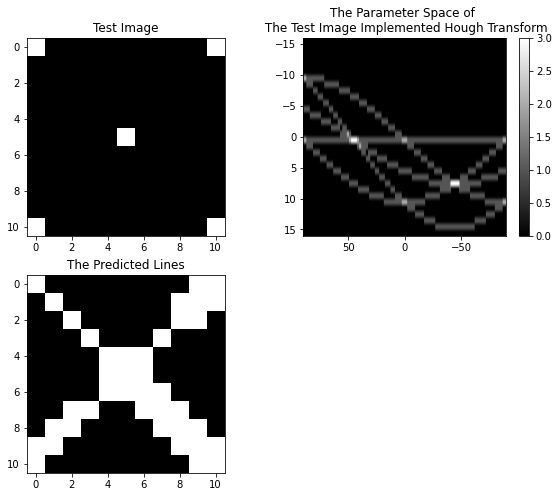

In [26]:
# (ii)
# generate the binary test image with size 11*11, 
# asign 4 ones to the corners, and one to the center
img_test = np.zeros([11,11])
img_test[0,0] = 1
img_test[0,-1] = 1
img_test[-1,0] = 1
img_test[-1,-1] = 1
img_test[5,5] = 1

accum = HT(img_test)
pred = HT_Pred(accum,img_test,2)
dist = np.round(np.sqrt(11**2*2)).astype(int)

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.imshow(img_test,cmap='gray')
plt.title('Test Image')
plt.subplot(2,2,2)
plt.imshow(accum,cmap='gray',aspect='auto',extent=[90,-90,dist,-1*dist])
plt.title('The Parameter Space of \n The Test Image Implemented Hough Transform')
plt.colorbar()
plt.subplot(2,2,3)
plt.imshow(pred,cmap='gray')
plt.title('The Predicted Lines')

In [67]:
img = cv2.imread('C://Users/10445/ECE-253/lane.png',0)
img_edge = cv2.Canny(img, 200, 300)/255
accum = HT(img_edge)
dist = np.round(np.sqrt(img.shape[0]**2+img.shape[1]**2)).astype(int)
img_ht = HT_Pred(accum,img) 

Text(0.5, 1.0, 'Original Image with Predicted Lines')

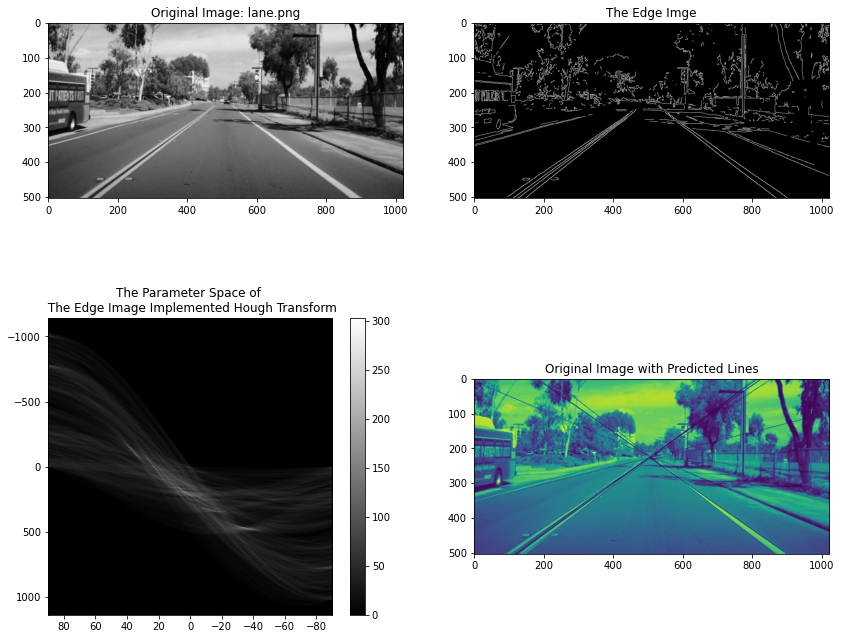

In [104]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
plt.imshow(img,cmap='gray')
plt.title('Original Image: lane.png')
plt.subplot(2,2,2)
plt.imshow(img_edge,cmap='gray')
plt.title('The Edge Imge')
plt.subplot(2,2,3)
plt.imshow(accum,cmap='gray',aspect='auto',extent=[90,-90,dist,-1*dist])
plt.title('The Parameter Space of \n The Edge Image Implemented Hough Transform')
plt.colorbar()
plt.subplot(2,2,4)
plt.imshow(img_ht)
plt.title('Original Image with Predicted Lines')

In [79]:
parameters = np.argwhere(accum>0.75*np.max(accum))
parameters[:,1] = parameters[:,1] - 90
print(parameters[:,1])

[-38 -35 -35 -23  15  34  36  36  37  37  38]


As the parameters shown above, the lines of lane should in the range: [-38,-35] U [34,36].

In [97]:
img_ht2 = HT_Pred(accum,img,interval=[-34,33]) 

Text(0.5, 1.0, 'Original Image With Only Lines')

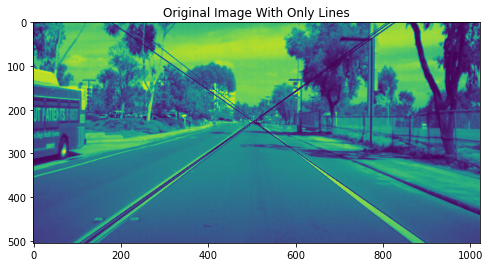

In [105]:
plt.figure(figsize = (8,8))
plt.imshow(img_ht2)
plt.title('Original Image With Only Lines')

### Problem 3.K-Means Segmentation

In [193]:
def createDataset(img):
    return img.reshape(img.shape[0]*img.shape[1], 3).astype(int)

In [205]:
def kMeansCluster(features, centers):
    '''
    Input:  
        features: N*M, row - data point, colm - feature
        centers:  k*M, row - initial value of a cluster center
    Output:
        idx:      N*1, the final cluster membership of each data point
        centers:  k*M, the final cluster center 
    '''
    iter = 200
    norms = np.zeros((features.shape[0],centers.shape[0]))
    idx = np.zeros(features.shape[0])
    next_centers = np.zeros((centers.shape[0],centers.shape[1]))
    
    for i in range(iter):
        # Assignment step
        for j in range(centers.shape[0]):
            norms[:,j] = np.linalg.norm(features-centers[j],axis=1)
        
        idx = np.argmin(norms,axis=1)
        
        # Update step
        for j in range(centers.shape[0]):
            cluster_feature = features[np.where(idx==j)]
            next_centers[j,:] = np.mean(cluster_feature, axis=0)
            
        if np.array_equal(next_centers, centers):
            break
        centers = next_centers.copy()
    return idx,centers

In [206]:
def mapValues(im,idx,centers):
    idx = idx.reshape((im.shape[0],im.shape[1]))   
    return centers[idx].astype(int)

In [207]:
img = cv2.imread('C://Users/10445/ECE-253/white-tower.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

nclusters = 7
np.random.seed(5) 
centers = features[np.random.randint(features.shape[0], size=nclusters),:] 
features = createDataset(img)
idx,centers = kMeansCluster(features,centers)

img_seg = mapValues(img,idx,centers)

Text(0.5, 1.0, 'Image After K-mean Segmentation')

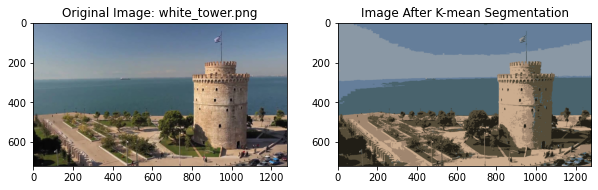

In [208]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original Image: white_tower.png')
plt.subplot(1,2,2)
plt.imshow(img_seg)
plt.title('Image After K-mean Segmentation')

In [219]:
print('The final cluster after k-mean: ')
for c in centers:
    print('    Cluster:',c.astype(int))

The final cluster after k-mean: 
    Cluster: [138 152 165]
    Cluster: [ 73  99 109]
    Cluster: [86 77 57]
    Cluster: [101 126 154]
    Cluster: [160 134 111]
    Cluster: [204 173 143]
    Cluster: [33 30 22]


## Problem 5. Tritongram

In [25]:
def find_closest_palette_color(pixel):
    return (np.floor(pixel/255*10)*(255/10))

def myTritongram(im):
    myTriton = cv2.cvtColor(im.copy(),cv2.COLOR_BGR2YUV)
    myTriton[:,:,1] = cv2.equalizeHist(im[:,:,1])
    myTriton = cv2.cvtColor(myTriton,cv2.COLOR_YUV2BGR)
    myTriton = cv2.cvtColor(myTriton, cv2.COLOR_BGR2RGB)
    w,h,cb = myTriton.shape
    im_FSD = np.pad(np.copy(myTriton),((1,1),(1,1),(0,0)), 'symmetric').astype(float)
    
    for i in range(w+1):
        for j in range(h+1):
            old_pixel = np.copy(im_FSD[i,j])
            new_pixel = find_closest_palette_color(old_pixel)
            im_FSD[i,j] = new_pixel
            quant_error = old_pixel - new_pixel
            im_FSD[i+1,j] += quant_error*7/16 
            im_FSD[i-1,j-1] += quant_error*3/16
            im_FSD[i,j+1] += quant_error*5/16
            im_FSD[i+1,j+1] += quant_error*1/16
    im_FSD = np.where(im_FSD>255,255,im_FSD).astype(int)
                                       
    return im_FSD

In [29]:
im = cv2.imread('C://Users/10445/ECE-253/test.jpg')

myTriton = myTritongram(im)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

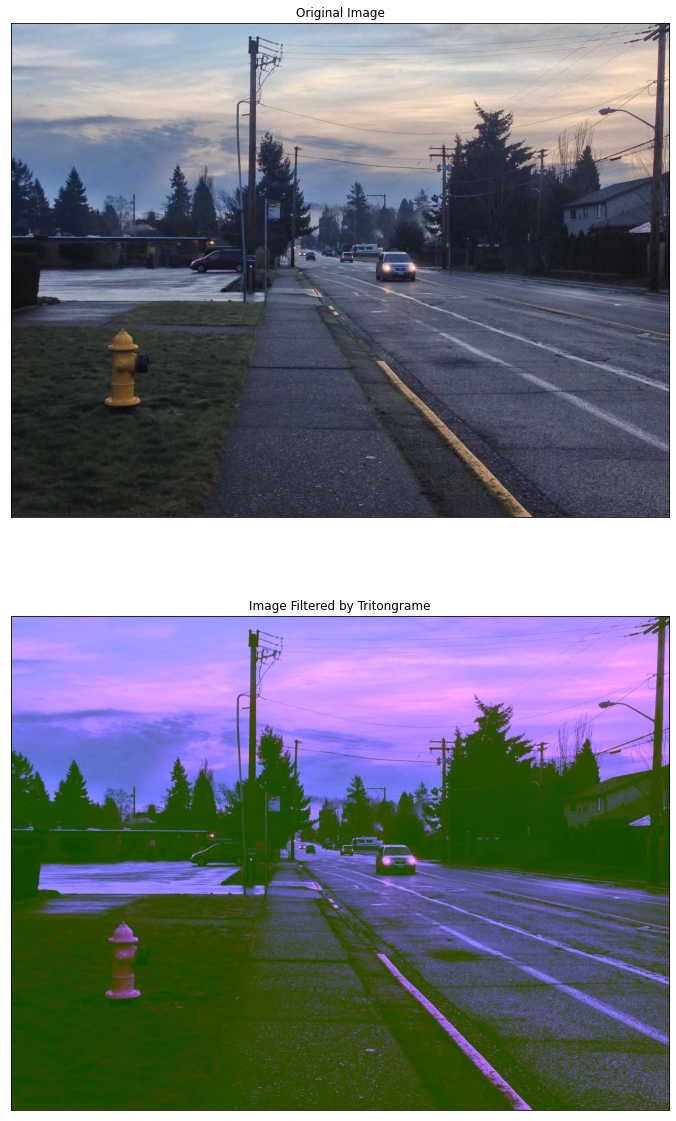

In [31]:
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(2,1,1)
ax1.imshow(im)
ax1.title.set_text('Original Image')
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax2 = fig.add_subplot(2,1,2)
ax2.imshow(myTriton)
ax2.title.set_text('Image Filtered by Tritongrame')
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)